## Classificação - Árvore de decisão  

Autor: Alan Diego    
Dados: Conjunto Íris  
Classificador: Árvore de Decisão  


## Importando os módulos necessários para criar a classificação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
%matplotlib inline

## Carregando o Dataset - Íris

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Features  

Sepal Length Cm -> Comprimento da sépala Cm  
Sepal Width  Cm -> Largura da sépala Cm  
Petal Length Cm -> Comprimento da pétala Cm  
Petal Width Cm  -> Largura da pétala Cm




* O algoritmo consegue trabalhar melhor com valores numéricos do que com strings. Dado essa informação vamos tranformar os valores nominais Species em dados numéricos.
* https://pandas.pydata.org/docs/reference/api/pandas.factorize.html

In [6]:
#Categorizando
idCat,cat = pd.factorize(df["Species"])

In [7]:
#id das categorias
idCat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
#categorias
cat

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [10]:
#Agora vamos criar uma coluna SpeciesCat e igualar com idCat
df['SpeciesCat'] = idCat

In [11]:
#Nova coluna foi criada e já categorizada
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Temos:  
Iris-setosa -> 0  
Iris-versicolor -> 1    
Iris-virginica -> 2


In [14]:
#Colunas que não fazem sentido na análise - Id e Species - por esse motivo serão deletadas
del df['Id']
del df['Species']

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesCat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Análise Exploratória

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   SpeciesCat     150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesCat
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


c:\users\profe\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SpeciesCat', ylabel='PetalWidthCm'>

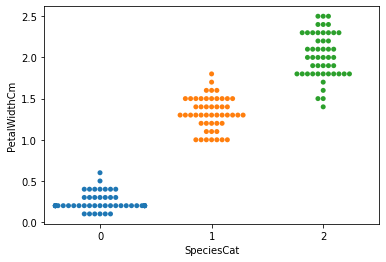

In [18]:
#visualizando gráfico largura da pétala
sns.swarmplot(x="SpeciesCat",y="PetalWidthCm",data=df)

## Dividindo os dados em treino e teste

In [22]:
#Separando x e y
X = df.drop('SpeciesCat', axis=1)
y = df['SpeciesCat']

In [23]:
#treinos e testes - test 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Hiperparâmetros

In [28]:
#Os parâmetros mais importantes são criterion e max_depth
#Por padrão o criterio e 'gini'
params = [
    {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,4,8,10,30,50,100]
    }
]

instância = DecisionTreeClassifier(max_depth=2, criterion='gini' )
grid_search = GridSearchCV(instância,params,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

## Previsões

In [30]:
#Realizar previsões do modelo

instância.fit(X_train, y_train)

pred = instância.predict(X_test)

pred[:5]

y_test[:5]




130    2
36     0
9      0
14     0
75     1
Name: SpeciesCat, dtype: int64

## Medindo Desempenho

In [32]:
instância.score(X_test,y_test)

cross = cross_val_score(instância,X_test,y_test,cv=5,scoring="accuracy")
final = sum(cross) / len(cross)
final

print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


## Realizando teste com Novos dados

In [39]:
newX = pd.DataFrame([
    [5.1,3.5,1.4,0.2]
],columns=X.columns)
newX

pred = instância.predict(newX)
pred

array([0], dtype=int64)